<h1>Лаба №6</h1>
<h2>Студента БС-83</h2>

<h2>Кльоміна Павла</h2>

In [16]:
import seaborn as sns
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

1. Обрати реальні дані з kaggle(https://www.kaggle.com/vitaliymalcev/russian-passenger-air-service-20072020#russian_passenger_air_service_2.csv). 
Я обрав цю базу даних щоб перевірити теорію про те, що кількість пасажірів Росії у 2010 році було значно більша за попередні роки, для прикладу взяв 2008 рік

In [79]:
databasepasanger = pd.read_csv("russian_passenger_air_service_2.csv", encoding = 'utf-8')
df_copy = databasepasanger.copy()
#df_copy=df_copy.set_index(['Year'])
#df_copy = databasepasanger[(databasepasanger['Year'] == 2008) | (databasepasanger['Year'] == 2016)]
NeedParametr=['Year','January','February','March','April','May','June','July','August','September','October','November','December']
mounth=['Year','January','February','March','April','May','June','July','August','September','October','November','December']
#Mouth={}
Mouth=df_copy[NeedParametr]
databasepasanger_1=Mouth[Mouth['Year']==2008]
databasepasanger_2=Mouth[Mouth['Year']==2010]
mounth=['January','February','March','April','May','June','July','August','September','October','November','December']


data = pd.DataFrame({
    ('2008'):[sum(databasepasanger_1['January'])
              ,sum(databasepasanger_1['February'])
              ,sum(databasepasanger_1['March'])
              ,sum(databasepasanger_1['April'])
              ,sum(databasepasanger_1['May'])
              ,sum(databasepasanger_1['June'])
              ,sum(databasepasanger_1['July'])
              ,sum(databasepasanger_1['August'])
              ,sum(databasepasanger_1['September'])
              ,sum(databasepasanger_1['October'])
              ,sum(databasepasanger_1['November'])
              ,sum(databasepasanger_1['December'])],
    ('2010'):[sum(databasepasanger_2['January'])
              ,sum(databasepasanger_2['February'])
              ,sum(databasepasanger_2['March'])
              ,sum(databasepasanger_2['April'])
              ,sum(databasepasanger_2['May'])
              ,sum(databasepasanger_2['June'])
              ,sum(databasepasanger_2['July'])
              ,sum(databasepasanger_2['August'])
              ,sum(databasepasanger_2['September'])
              ,sum(databasepasanger_2['October'])
              ,sum(databasepasanger_2['November'])
              ,sum(databasepasanger_2['December'])]
    },mounth);

data

,2008,2010
January,5196871.0,5705839.0
February,5034272.0,5188681.0
March,5757366.0,6099881.0
April,6168871.0,6330317.0
May,7153877.0,7727951.0
June,8522100.0,9259617.0
July,9421481.0,10687677.0
August,9892476.0,10850143.0
September,8130700.0,9426970.0
October,6466454.0,8181908.0


2. Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

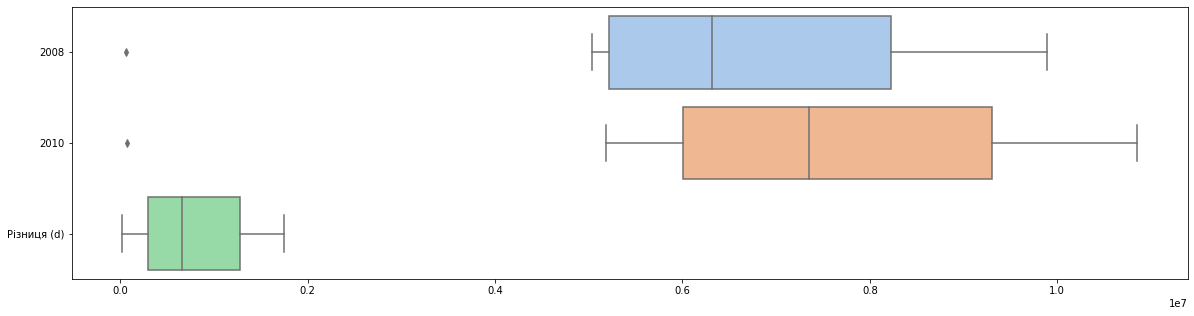

In [125]:
plt.subplots(figsize=(20,5))
sns.boxplot(orient = "h",data = data, palette="pastel")

3.для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [134]:
def cor_pirson(data):
    r = (len(data)*(sum(data.iloc[:,0]*data.iloc[:,1])) - sum(data.iloc[:,0])*sum(data.iloc[:,1]))/(np.sqrt((len(data)*sum(data.iloc[:,0]**2) - sum(data.iloc[:,0])**2)*(len(data)*sum(data.iloc[:,1]**2) - sum(data.iloc[:,1])**2)))
    kor_anal = pd.read_excel("Таблиця критичних значень кореляційного аналізу.xlsx",encoding = 'utf-8')  

    df = len(data)-2
    table_val = 0
    if(df <= 120):
        for i in range(len(kor_anal)-1):
            if(df == int(kor_anal.iloc[i,0])):
                table_val = kor_anal.iloc[i,1]
            else:
                if ((df>=int(kor_anal.iloc[i,0])) and (df<=int(kor_anal.iloc[i,0]))):
                     table_val = kor_anal.iloc[i,1]                              
    else:
        table_val = kor_anal.iloc[38,1]
    if(abs(r) > table_val):
        significant = "significant"
    else:
        significant ="not significant"
    
    ansver=[r,df,significant]
    return ansver



In [135]:
result_pirson = cor_pirson(data)
print(result_pirson)

[0.983459986720713, 10, 'significant']


4.для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [137]:
def student(data):    
    data["Різниця (d)"] = data.iloc[:,1]-data.iloc[:,0]

    M = np.mean(data.iloc[:,2])
    st = np.std(data.iloc[:,2])
    t = (M/st) * np.sqrt(len(data))

    df = len(data)-1   
    kor_anal = pd.read_excel("Таблица критических значений для парного критерия.xlsx",encoding = 'utf-8')   

    table_val = 0
    print(data)
    if(df <= 350):
        for i in range(len(kor_anal)-1):
            if(df == int(kor_anal.iloc[i,0])):
                table_val = kor_anal.iloc[i,1]
                break
            else:
                if ((df>=int(kor_anal.iloc[i,0])) and (df<=int(kor_anal.iloc[i,0]))):
                    
                    table_val = kor_anal.iloc[i,1]
                        
    else:
        table_val = kor_anal.iloc[92,1]
    if(t < table_val):
        significant = "significant"
    else:
        significant="not significant"
    ansver =[t,df,significant]
    return ansver

In [138]:
res_student = student(data)
print(res_student)
data

                2008        2010  Різниця (d)
January    5196871.0   5705839.0     508968.0
February   5034272.0   5188681.0     154409.0
March      5757366.0   6099881.0     342515.0
April      6168871.0   6330317.0     161446.0
May        7153877.0   7727951.0     574074.0
June       8522100.0   9259617.0     737517.0
July       9421481.0  10687677.0    1266196.0
August     9892476.0  10850143.0     957667.0
September  8130700.0   9426970.0    1296270.0
October    6466454.0   8181908.0    1715454.0
November   5223827.0   6964715.0    1740888.0
December     54622.1     74638.5      20016.4
[4.742237272863966, 11, 'not significant']


,2008,2010,Різниця (d)
January,5196871.0,5705839.0,508968.0
February,5034272.0,5188681.0,154409.0
March,5757366.0,6099881.0,342515.0
April,6168871.0,6330317.0,161446.0
May,7153877.0,7727951.0,574074.0
June,8522100.0,9259617.0,737517.0
July,9421481.0,10687677.0,1266196.0
August,9892476.0,10850143.0,957667.0
September,8130700.0,9426970.0,1296270.0
October,6466454.0,8181908.0,1715454.0


5.Перевірити розбіжність на між групами на даних з п. 1.

In [85]:
table = pd.DataFrame({
    "Критерій Пірсона":result_pirson,
    "Критерій Стьюдента":res_student
}, index = ["Значення", "ступінь свободи", "Значимість зв'язку"])
table

,Критерій Пірсона,Критерій Стьюдента
Значення,7.65733e+15,-4.74224
ступінь свободи,10,11
Значимість зв'язку,significant,significant


6. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.

In [86]:
print(54*'-'+"\nВисновки:")
if(table.iloc[2,0] == "significant"):
    print("Корреляціонний зв'язок між ними статистично значимий")
else:
    print("Корреляціонний зв'язок між ними відсутній")
          
if(table.iloc[2,1] == "significant"):
    print("Парні групи рівні")
else:
    print("Парні групи відмінні")
print(54*'-')

------------------------------------------------------
Висновки:
Корреляціонний зв'язок між ними статистично значимий
Парні групи рівні
------------------------------------------------------
